#  Classification 1

Logistic Regression and KNN


## Logistic Regression

In [3]:
# Example 1

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [6]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [7]:
model =LogisticRegression(solver='liblinear')

In [8]:
model.fit(x,y)

LogisticRegression(solver='liblinear')

In [9]:
model.classes_

array([0, 1])

In [10]:
# untuk tahu nilai actual
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
# tahu nilai prediksi
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# mengetahui akurasi model, means 90% di case ini
model.score(x,y)

0.9

In [14]:
# untuk tahu salahnya di mana
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

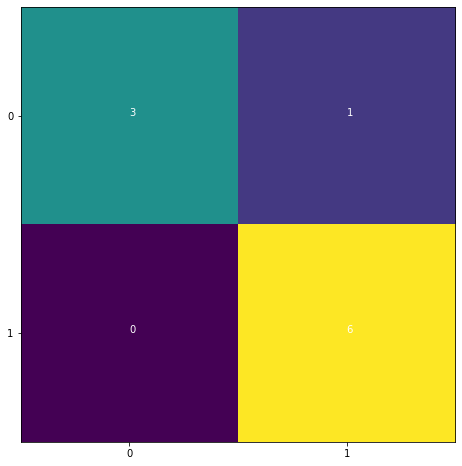

In [19]:
cm =confusion_matrix(y, model.predict(x))

fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1))
ax.yaxis.set(ticks=(0,1))

for i in range(2): 
    for j in range(2):
        ax.text(j,i, cm[i,j], color='white')
        
plt.show()

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [21]:
# improving model (edit data, scaling data, burning data)

model =LogisticRegression(solver='liblinear', C=10.0)

In [24]:
model.fit(x,y)

LogisticRegression(C=10.0, solver='liblinear')

In [25]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
model.score(x,y)

1.0

In [29]:
# example 2

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
x,y = load_digits(return_X_y=True)

In [31]:
print (x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [35]:
scaler = StandardScaler()

x_train=scaler.fit_transform(x_train)

In [36]:
x_train

array([[ 0.        , -0.34002441,  0.18520519, ...,  0.04584977,
        -0.50311269, -0.19093267],
       [ 0.        , -0.34002441, -0.02618469, ...,  0.21653922,
        -0.50311269, -0.19093267],
       [ 0.        , -0.34002441, -0.02618469, ...,  1.58205476,
        -0.01379091, -0.19093267],
       ...,
       [ 0.        , -0.34002441,  0.18520519, ...,  1.58205476,
         3.41146159,  6.06846464],
       [ 0.        , -0.34002441,  2.08771414, ...,  1.06998643,
         0.96485266, -0.19093267],
       [ 0.        , -0.34002441, -0.66035434, ...,  0.72860754,
         3.41146159,  2.93876598]])

In [37]:
model =LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [38]:
x_test=scaler.fit_transform(x_test)

In [39]:
y_pred=model.predict(x_test)

In [42]:
model.score(x_train, y_train)

0.9986082115518441

In [43]:
model.score(x_test, y_test)

0.9666666666666667

In [44]:
confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  1,  0,  1,  1,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]], dtype=int64)

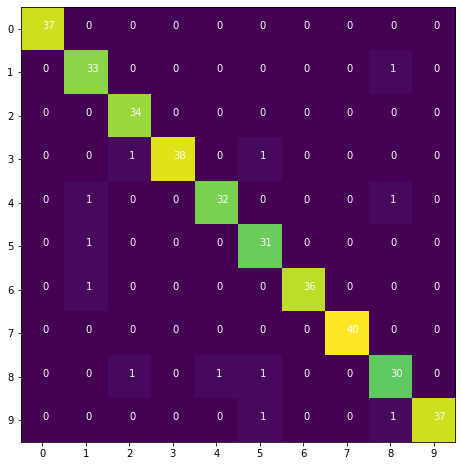

In [45]:
cm =confusion_matrix(y_test, y_pred)

fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

for i in range(10): 
    for j in range(10):
        ax.text(j,i, cm[i,j], color='white')
        
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      0.97      0.94        34
           2       0.94      1.00      0.97        34
           3       1.00      0.95      0.97        40
           4       0.97      0.94      0.96        34
           5       0.91      0.97      0.94        32
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        40
           8       0.91      0.91      0.91        33
           9       1.00      0.95      0.97        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## K-Nearest Neighbor (KNN)

In [47]:
weather = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny']
temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild']
play = ['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes']

In [48]:
from sklearn import preprocessing

# ubah string ke numerik otomatis

le =preprocessing.LabelEncoder()

weatherE= le.fit_transform(weather)
print(weatherE)

[2 2 0 1 1 1 0 2]


In [49]:
tempE = le.fit_transform(temp)
label = le.fit_transform(play)

In [51]:
# gabungin weather dan temp
features=list(zip(weatherE, tempE))

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [55]:
model.predict([(0,2)])

array([0], dtype=int64)

In [57]:
from sklearn import datasets
wine=datasets.load_wine()

In [59]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [60]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [63]:
x_train, x_test, y_train, y_test=train_test_split(wine.data, wine.target, test_size=0.3)

In [65]:
model=KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

y_pred= model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6111111111111112

In [68]:
model=KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

y_pred= model.predict(x_test)

accuracy_score(y_test, y_pred)

0.6481481481481481

In [72]:
error=[]

for i in range (1,40):
    model =KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

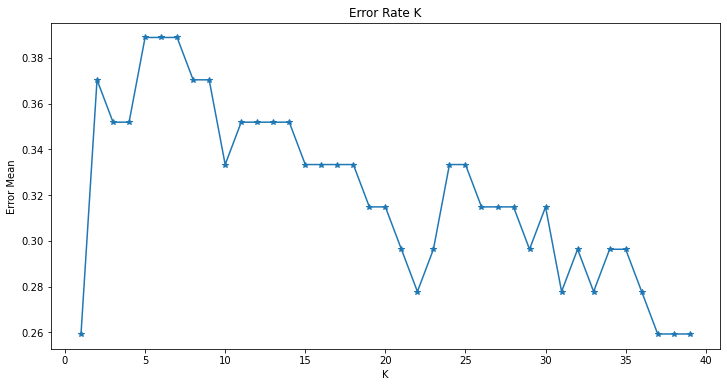

In [73]:
plt.figure(figsize=(12,6))

plt.plot(range(1,40), error, marker='*')

plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')

plt.show()